1. Считываем файлы и преобразовываем ежедневные показатели в файле "КурсДоллара.xlsx" из ежедневных в ежемесячные путем нахождение среднего значения за месяц.

In [59]:
import pandas as pd

# Чтение данных из файлов
df_ipc = pd.read_csv('ИПЦ.csv')
df_dollar = pd.read_excel('КурсДоллара.xlsx')
# Ограничим данные 2018 годом
df_ipc = df_ipc[df_ipc['Год'] >= 2018]
# Выводим таблицу ИПЦ
print("Первые строки таблицы ИПЦ:")
print(df_ipc)

# Переводим столбец 'data' в тип datetime 
df_dollar['data'] = pd.to_datetime(df_dollar['data'])

# Изменяем формат столбца 'data' в 'КурсДоллара.xlsx' на 'YYYY-MM'
df_dollar['data'] = df_dollar['data'].dt.strftime('%Y-%m')

# Группируем данные по месяцам и вычисляем среднее значение для каждого месяца
df_dollar_monthly = df_dollar.groupby('data').mean()
df_dollar_monthly = df_dollar_monthly[df_dollar_monthly.index <= '2023-10']
print("\nПервые строки таблицы КурсДоллара (ежемесячные значения):")
print(df_dollar_monthly)


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Первые строки таблицы ИПЦ:
     Год   Январь   Февраль    Март   Апрель     Май    Июнь    Июль   Август  \
27  2018   100.31    100.21  100.29   100.38  100.38  100.49  100.27   100.01   
28  2019   101.01    100.44  100.32   100.29  100.34  100.04  100.20    99.76   
29  2020   100.40    100.33  100.55   100.83  100.27  100.22  100.35    99.96   
30  2021   100.67    100.78  100.66   100.58  100.74  100.69  100.31   100.17   
31  2022   100.99    101.17  107.61   101.56  100.12   99.65   99.61    99.48   
32  2023   100.84    100.46  100.37   100.38  100.31  100.37  100.63   100.28   

     Сентябрь   Октябрь   Ноябрь   Декабрь  
27     100.16    100.35   100.50    100.84  
28      99.84    100.13   100.28    100.36  
29      99.93    100.43   100.71    100.83  
30     100.60    101.11   100.96    100.82  
31     100.05    100.18   100.37    100.78  
32     100.87    100.83      NaN       NaN  

Первые строки таблицы КурсДоллара (ежемесячные значения):
         nominal       curs
dat

C:\Users\admin\AppData\Local\Temp\ipykernel_15264\2707779604.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dollar_monthly = df_dollar.groupby('data').mean()


2. Приведем таблицы в единный формат данных

In [51]:
import pandas as pd

# Загрузка данных из файла
df = pd.read_csv('ИПЦ.csv')

# Преобразование данных
df = pd.melt(df, id_vars=['Год'], var_name='Месяц', value_name='ИПЦ')
df['Год-Месяц'] = df['Год'].astype(str) + '-' + df['Месяц']
df.drop(['Год', 'Месяц'], axis=1, inplace=True)

# Функция для преобразования 'Год-Месяц'
def transform_date(input_date_str):
    cleaned_input_date_str = input_date_str.replace(' ', '')
    month_dict = {
        'Январь': 1,
        'Февраль': 2,
        'Март': 3,
        'Апрель': 4,
        'Май': 5,
        'Июнь': 6,
        'Июль': 7,
        'Август': 8,
        'Сентябрь': 9,
        'Октябрь': 10,
        'Ноябрь': 11,
        'Декабрь': 12
    }
    year, month_name = cleaned_input_date_str.split('-')
    month_number = month_dict.get(month_name.strip())
    return f'{year}-{month_number:02}'

# Применяем функцию к столбцу 'Год-Месяц'
df['Год-Месяц'] = df['Год-Месяц'].apply(transform_date)

# Преобразование столбца "Год-Месяц" в формат YYYY-MM
df['Год-Месяц'] = pd.to_datetime(df['Год-Месяц'], format='%Y-%m').dt.strftime('%Y-%m')

# Переименование столбца 'Год-Месяц' в 'data'
df.rename(columns={'Год-Месяц': 'data'}, inplace=True)
# Фильтрация данных по убыванию
df = df.sort_values('data')
# Отрезание данных раньше 2018-10
df_ipc_format = df[(df['data'] >= '2018-10') & (df['data'] <= '2023-10')]

# Вывод первых строк (head) для данных
print(df_ipc_format)

        ИПЦ     data
324  100.35  2018-10
357  100.50  2018-11
390  100.84  2018-12
28   101.01  2019-01
61   100.44  2019-02
..      ...      ...
197  100.37  2023-06
230  100.63  2023-07
263  100.28  2023-08
296  100.87  2023-09
329  100.83  2023-10

[61 rows x 2 columns]


3. Построем графики динамики курса рубля и инфляции за последние 5 лет. с октября 2018 по октябрь 2023

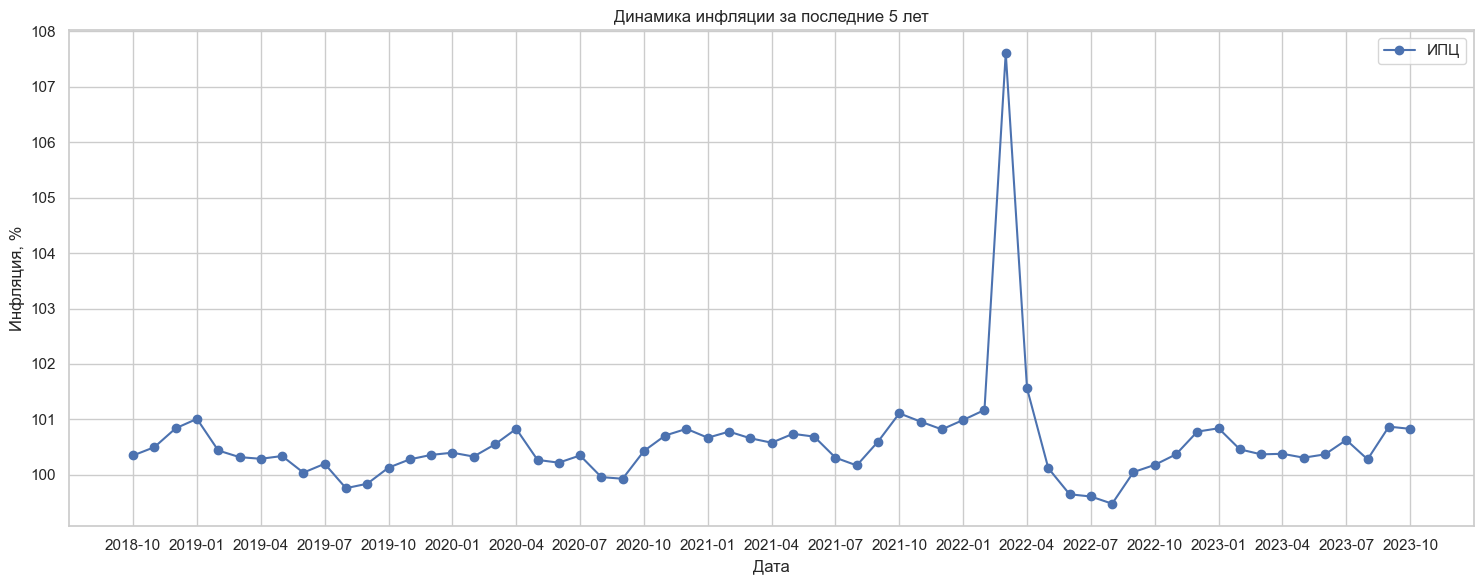

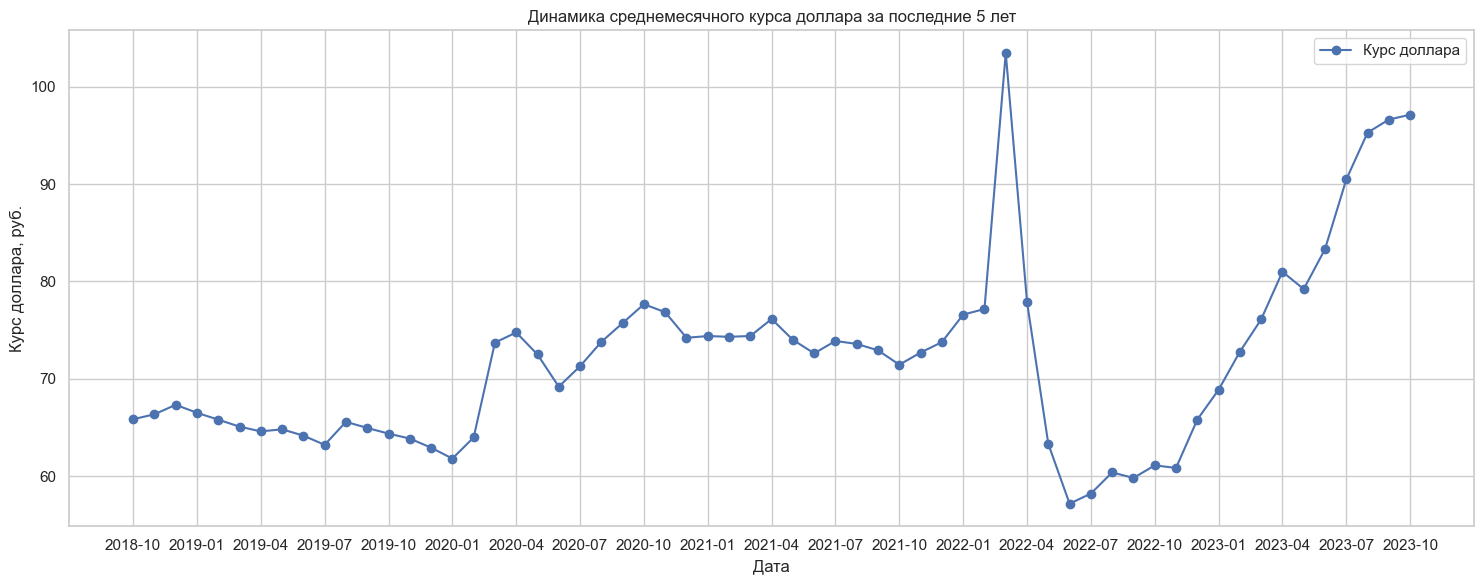

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
plt.plot(df_ipc_format.index, df_ipc_format['ИПЦ'], label='ИПЦ', marker='o', linestyle='-')
plt.title('Динамика инфляции за последние 5 лет')
plt.xlabel('Дата')
plt.ylabel('Инфляция, %')
plt.legend()
plt.grid(True)

xticks = plt.xticks(np.arange(0, len(df_ipc_format.index), step=3))

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(df_dollar_monthly.index, df_dollar_monthly['curs'], label='Курс доллара', marker='o', linestyle='-')
plt.title('Динамика среднемесячного курса доллара за последние 5 лет')
plt.xlabel('Дата')
plt.ylabel('Курс доллара, руб.')
plt.legend()
plt.grid(True)

xticks = plt.xticks(np.arange(0, len(df_dollar_monthly.index), step=3))

plt.tight_layout()
plt.show()




4. Модель линейной регрессии, показывающая влияние курса рубля на инфляцию


Функция регрессии: y = 0.06x + 96.44


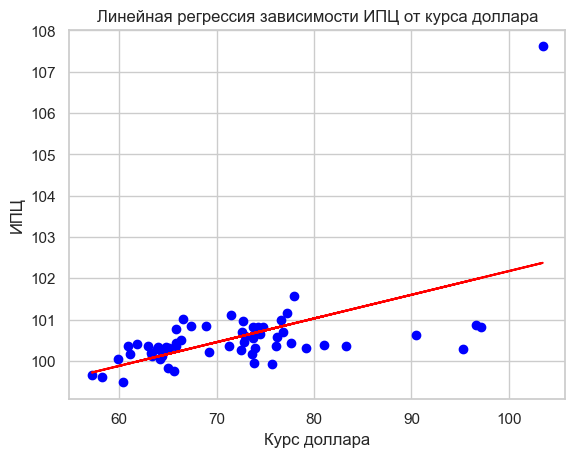

Cредняя квадратичная ошибка =  0.68
Коэффициент детерминации =  0.31 . Это говорит о том, что  30.71 % инфляции могут быть объяснены изменением курса доллара по этой модели


In [103]:
# Объединение данных в один DataFrame
df_merged = pd.merge(df_dollar_monthly, df_ipc_format, on='data')

# Подготовка данных для модели линейной регрессии
X = df_merged['curs'].values.reshape(-1, 1) 
y = df_merged['ИПЦ'].values  


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Функция регрессии: y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_))

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Курс доллара,руб')
plt.ylabel('ИПЦ,%')
plt.title('Линейная регрессия зависимости ИПЦ от курса рубля')
plt.show()

print(f'Cредняя квадратичная ошибка = ', round(mse, 2))
print(f'Коэффициент детерминации = ', round(r2, 2), '. Это говорит о том, что ', round(r2*100, 2), '% инфляции могут быть объяснены изменением курса рубля по этой модели')

5. Попробуем для увеличения точности модели убрать из рассчетов выброс марта 2022 года

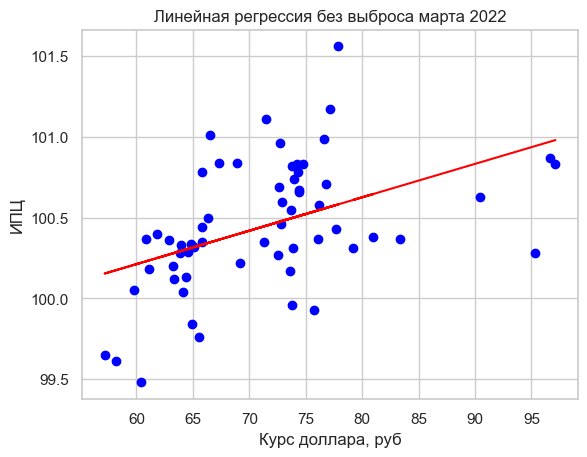

Функция регрессии: y = 0.02x + 98.97
Cредняя квадратичная ошибка =  0.12
Коэффициент детерминации =  0.21 . Это говорит о том, что  20.86 % инфляции могут быть объяснены изменением курса доллара по этой модели


In [118]:
# Фильтрация данных для исключения марта 2022 года
df_filtered = df_merged[df_merged.index != '2022-03']
X_filtered = df_filtered['curs'].values.reshape(-1, 1)
y_filtered = df_filtered['ИПЦ'].values

model.fit(X_filtered, y_filtered)
y_pred_filtered = model.predict(X_filtered)

mse_filtered = mean_squared_error(y_filtered, y_pred_filtered)
r2_filtered = r2_score(y_filtered, y_pred_filtered)

plt.scatter(X_filtered, y_filtered, color='blue')
plt.plot(X_filtered, y_pred_filtered, color='red')
plt.xlabel('Курс доллара, руб')
plt.ylabel('ИПЦ')
plt.title('Линейная регрессия без выброса марта 2022')
plt.show()

print("Функция регрессии: y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_))
print(f'Cредняя квадратичная ошибка = ', round(mse_filtered, 2))
print(f'Коэффициент детерминации = ', round(r2_filtered, 2), '. Это говорит о том, что ', round(r2_filtered*100, 2), '% инфляции могут быть объяснены изменением курса доллара по этой модели')


При исключении из модели выброса в виде данных за март 2022 года, можно сделать вывод, что курс рубля совершено точно имеет прямое влияние на ИПЦ. При увеличении стоимости доллара на 1 рубль произойдет рост ИПЦ на 2%. Однако, низкий коэфициент детерминации указывает, что только около 20% вариативности ИПЦ может быть объяснено курсом рубля, а другие 80% приходятся на неучтенные в модели факторы. Несмотря на то, что курс рубля, совершенно точно, имеет влияние на рост инфляции, выводы о уровне влияния можно будет сделать только обогатив модель дополнительными факторами.

6. Теперь рассмотрим влияние инфляции на курс рубля

Функция регрессии: y = 5.36x + -466.88


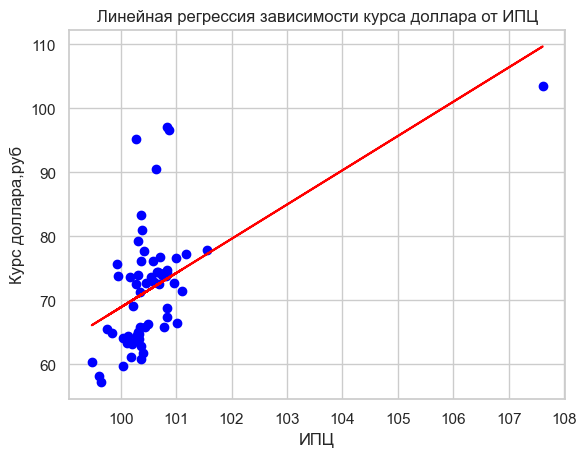

Средняя квадратичная ошибка =  63.54
Коэффициент детерминации =  0.31 . Это говорит о том, что  30.71 % изменения курса доллара могут быть объяснены изменениями в ИПЦ по этой модели


In [117]:
X = df_merged['ИПЦ'].values.reshape(-1, 1)
y = df_merged['curs'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Функция регрессии: y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_))

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('ИПЦ')
plt.ylabel('Курс доллара,руб')
plt.title('Линейная регрессия зависимости курса доллара от ИПЦ')
plt.show()

print(f'Средняя квадратичная ошибка = ', round(mse, 2))
print(f'Коэффициент детерминации = ', round(r2, 2), '. Это говорит о том, что ', round(r2*100, 2), '% изменения курса доллара могут быть объяснены изменениями в ИПЦ по этой модели')


6. Также рассмотрим значения без марта 2022 года

Функция регрессии: y = 10.08x + -940.96


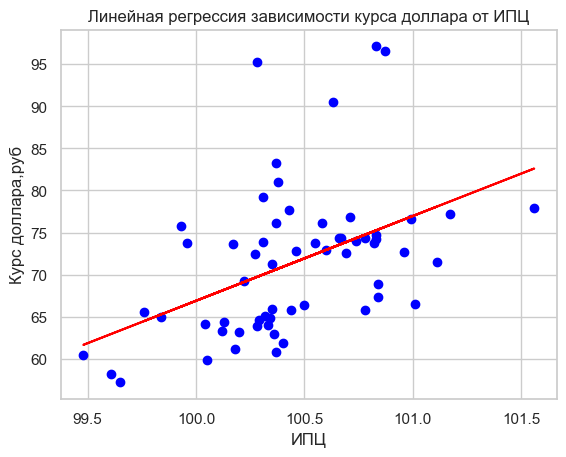

Средняя квадратичная ошибка =  60.45
Коэффициент детерминации =  0.21 . Это говорит о том, что  20.86 % изменения курса доллара могут быть объяснены изменениями в ИПЦ по этой модели


In [116]:
X = df_filtered['ИПЦ'].values.reshape(-1, 1)
y = df_filtered['curs'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Функция регрессии: y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_))

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('ИПЦ')
plt.ylabel('Курс доллара,руб')
plt.title('Линейная регрессия зависимости курса доллара от ИПЦ')
plt.show()

print(f'Средняя квадратичная ошибка = ', round(mse, 2))
print(f'Коэффициент детерминации = ', round(r2, 2), '. Это говорит о том, что ', round(r2*100, 2), '% изменения курса доллара могут быть объяснены изменениями в ИПЦ по этой модели')


Даже, если убрать из модели данных очевидный выброс, ошибка модели остается высокой, а коэффициент детерминации низким, что может говорить о незначительном влиянии фактора инфляции на курс рубля в последние 5 лет